1. Apply salt and pepper noise to the following image and remove the noise using min and
max filtering technique. Show input and output side by side.

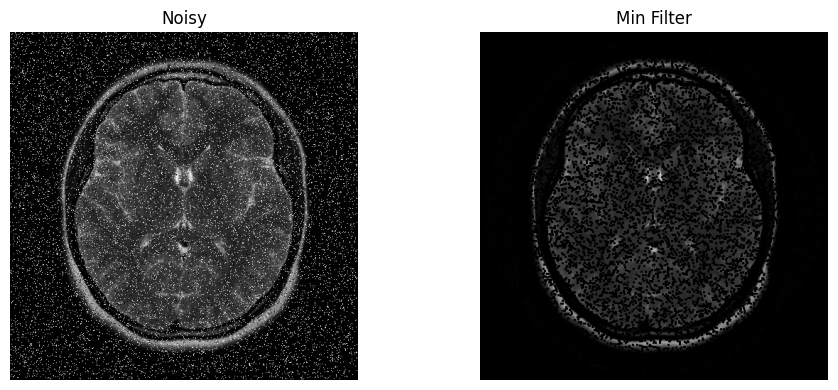

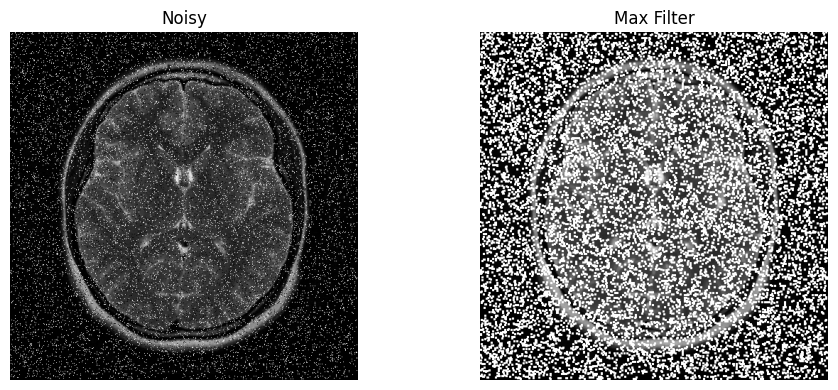

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_pair(a, ta, b, tb):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB)); plt.title(ta); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB)); plt.title(tb); plt.axis('off')
    plt.tight_layout(); plt.show()

img = cv2.imread('/content/1.jpg')

s_vs_p = 0.5
amount = 0.04
out = img.copy()
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
out[coords[0], coords[1], :] = 255
num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
out[coords[0], coords[1], :] = 0

kernel = np.ones((3,3), np.uint8)
min_filtered = cv2.erode(out, kernel)
max_filtered = cv2.dilate(out, kernel)

show_pair(out, 'Noisy', min_filtered, 'Min Filter')
show_pair(out, 'Noisy', max_filtered, 'Max Filter')

2. Apply Gaussian noise to the following image and remove the noise using Gaussian
filtering. Show input and output side by side.

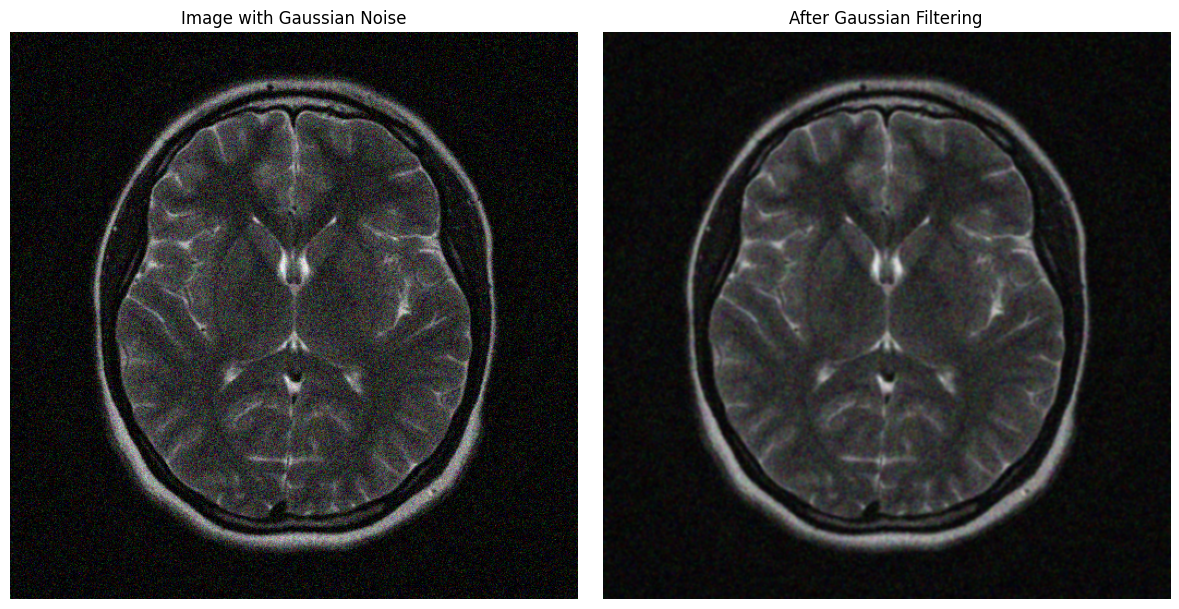

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def add_gaussian_noise(img, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, img.shape).astype(np.float32)
    noisy_img = img.astype(np.float32) + gauss
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

noisy_image = add_gaussian_noise(image)

denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title("Image with Gaussian Noise")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title("After Gaussian Filtering")
plt.axis('off')

plt.tight_layout()
plt.show()


3. Apply any noise to the following image and restore it using:

a)bold text Box filtering
b) Average filtering
c) Median filtering
Show input and output side by side. Also show the comparison between the 3 techniques.
Mention which method works better than others.

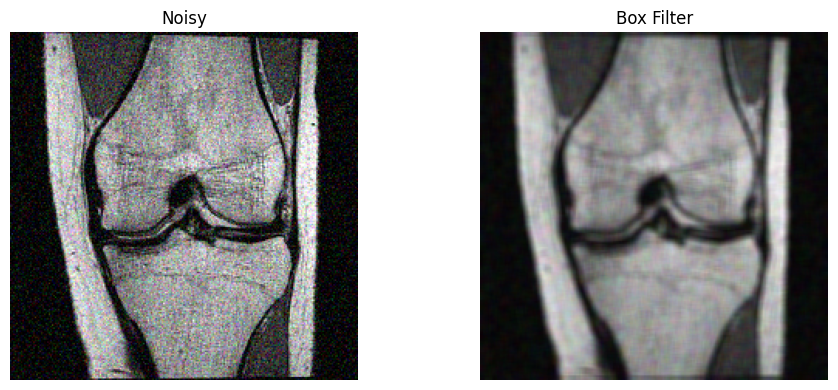

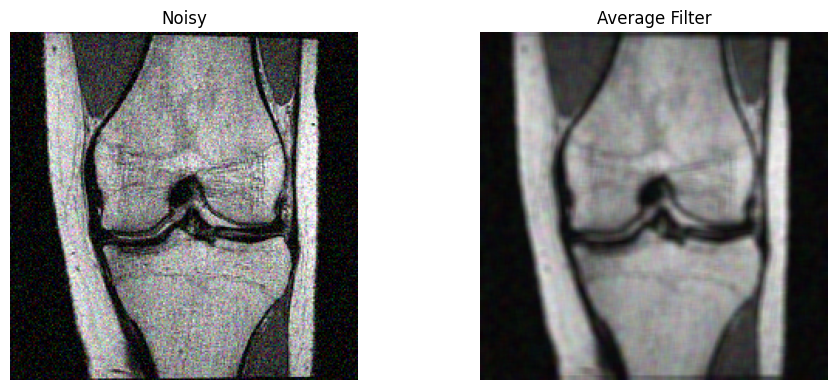

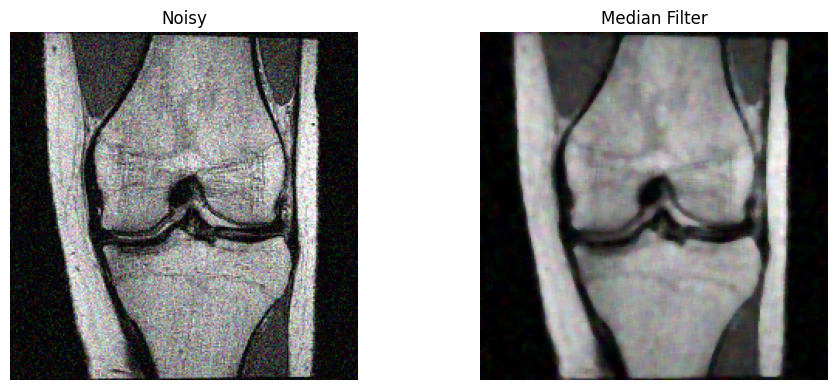

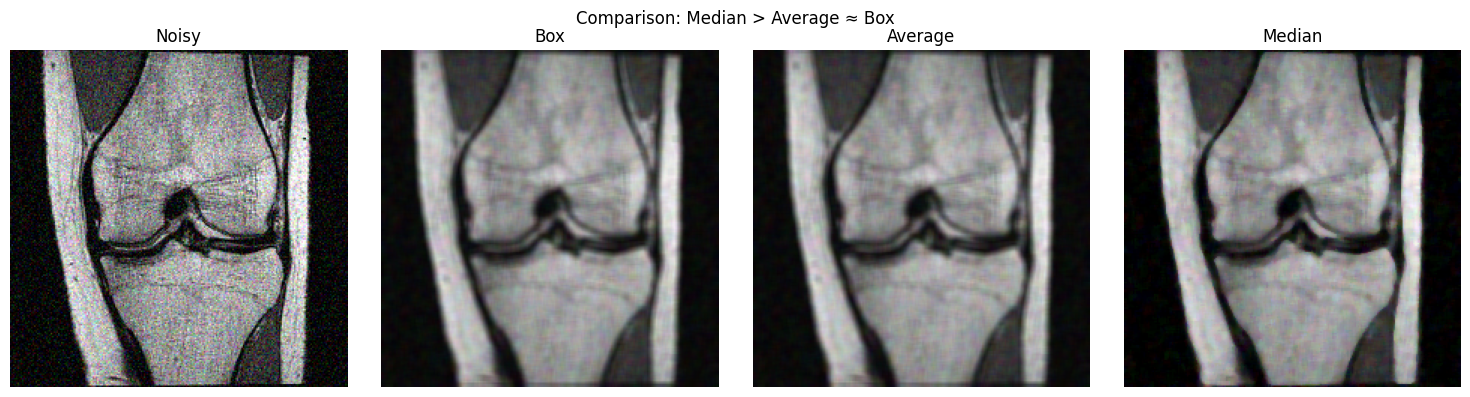

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_pair(a, ta, b, tb):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB)); plt.title(ta); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB)); plt.title(tb); plt.axis('off')
    plt.tight_layout(); plt.show()

img = cv2.imread('/content/3.jpg')
noise = np.random.normal(0, 25, img.shape).astype(np.float32)
noisy = cv2.add(img.astype(np.float32), noise)
noisy = np.clip(noisy, 0, 255).astype(np.uint8)

box = cv2.boxFilter(noisy, -1, (5,5))
avg = cv2.blur(noisy, (5,5))
med = cv2.medianBlur(noisy, 5)

show_pair(noisy, 'Noisy', box, 'Box Filter')
show_pair(noisy, 'Noisy', avg, 'Average Filter')
show_pair(noisy, 'Noisy', med, 'Median Filter')

plt.figure(figsize=(15,4))
plt.subplot(1,4,1); plt.imshow(cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB)); plt.title('Noisy'); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB)); plt.title('Box'); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB)); plt.title('Average'); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(cv2.cvtColor(med, cv2.COLOR_BGR2RGB)); plt.title('Median'); plt.axis('off')
plt.suptitle('Comparison: Median > Average ≈ Box')
plt.tight_layout(); plt.show()

4. Using the following image, solve questions a - f.
a) Read and show the image.
b) Show the matrix form of the image.
c) Show the pixel information by hovering the cursor on the image.
d) Find the value of the pixel (10, 78).
e) Show the size of the image.
f) Show the all the information of the image.

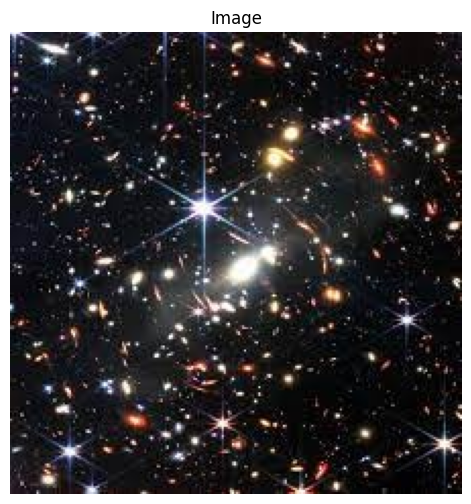

Matrix form of the image:

[[[227 231 255]
  [241 245 255]
  [250 251 255]
  ...
  [ 28  26  31]
  [ 45  44  50]
  [ 41  40  46]]

 [[110 114 139]
  [198 202 227]
  [218 222 249]
  ...
  [ 11   9  14]
  [ 33  32  38]
  [ 36  35  41]]

 [[ 47  53  79]
  [118 124 150]
  [190 194 221]
  ...
  [  7   5  10]
  [ 25  22  29]
  [ 25  22  29]]

 ...

 [[ 47  34  44]
  [ 38  25  35]
  [ 34  21  31]
  ...
  [ 17  13  10]
  [ 27  23  20]
  [ 33  29  26]]

 [[ 47  34  44]
  [ 38  25  35]
  [ 34  21  31]
  ...
  [  5   4   0]
  [ 14  10   7]
  [ 18  14  11]]

 [[ 47  34  44]
  [ 38  25  35]
  [ 34  21  31]
  ...
  [  1   0   0]
  [  6   2   0]
  [  7   3   0]]]


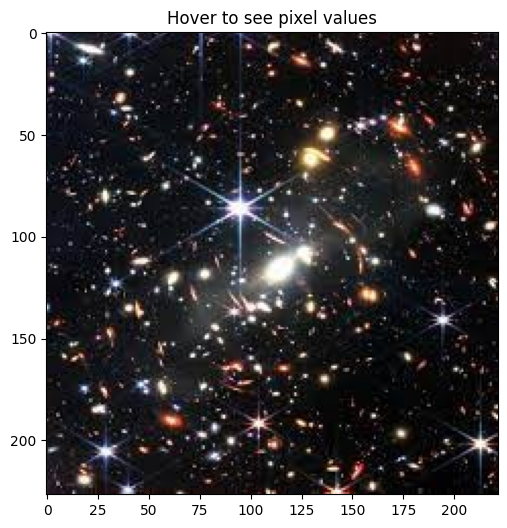

Value of pixel at (10, 78): R=20, G=17, B=26
Size of the image: Width=222, Height=227, Channels=3

--- Image Information ---
Shape        : (227, 222, 3)
Data type    : uint8
Max value    : 255
Min value    : 0
Mean value   : 37.33


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib

# a) Read and show the image
img = cv2.imread('/content/4.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Image")
plt.axis('off')
plt.show()

print("Matrix form of the image:\n")
print(img_rgb)

def show_image_with_hover(img):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title("Hover to see pixel values")
    im = ax.imshow(img)

    def format_coord(x, y):
        col = int(x + 0.5)
        row = int(y + 0.5)
        if 0 <= col < img.shape[1] and 0 <= row < img.shape[0]:
            R, G, B = img[row, col]
            return f"x={col}, y={row}, R={R}, G={G}, B={B}"
        else:
            return "Out of bounds"

    ax.format_coord = format_coord
    plt.show()

show_image_with_hover(img_rgb)

pixel_value = img_rgb[10, 78]
print(f"Value of pixel at (10, 78): R={pixel_value[0]}, G={pixel_value[1]}, B={pixel_value[2]}")

height, width, channels = img_rgb.shape
print(f"Size of the image: Width={width}, Height={height}, Channels={channels}")

print("\n--- Image Information ---")
print(f"Shape        : {img_rgb.shape}")
print(f"Data type    : {img_rgb.dtype}")
print(f"Max value    : {img_rgb.max()}")
print(f"Min value    : {img_rgb.min()}")
print(f"Mean value   : {img_rgb.mean():.2f}")


5


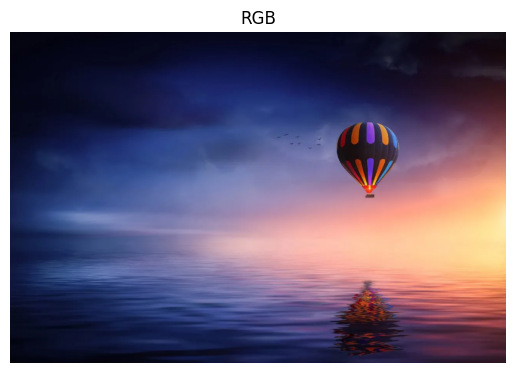

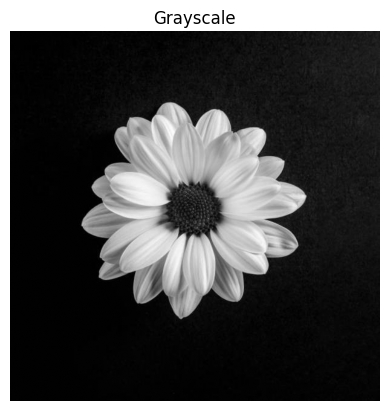

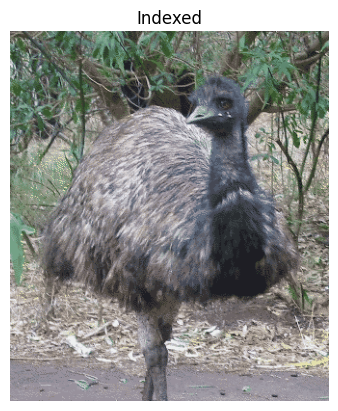

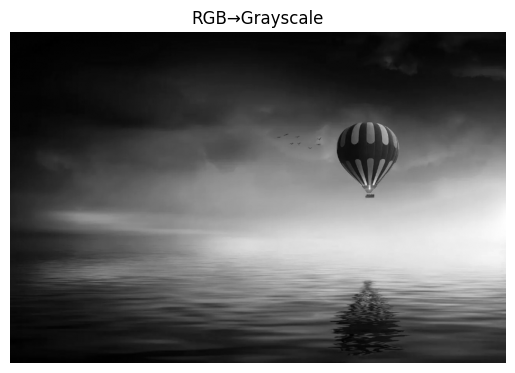

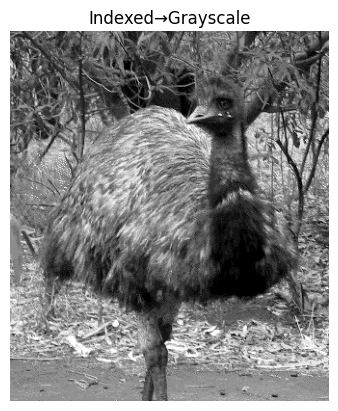

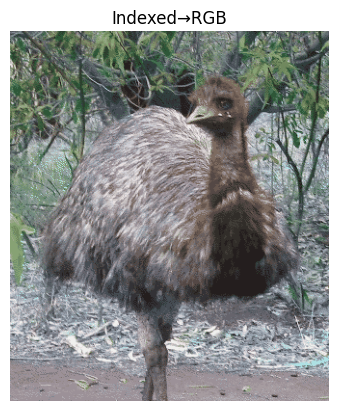

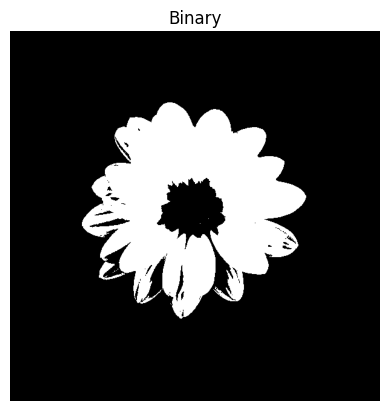

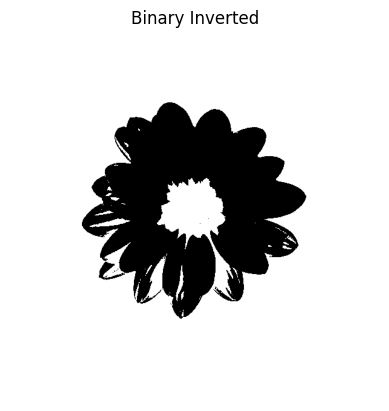

/tmp/ipython-input-3270747814.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256])


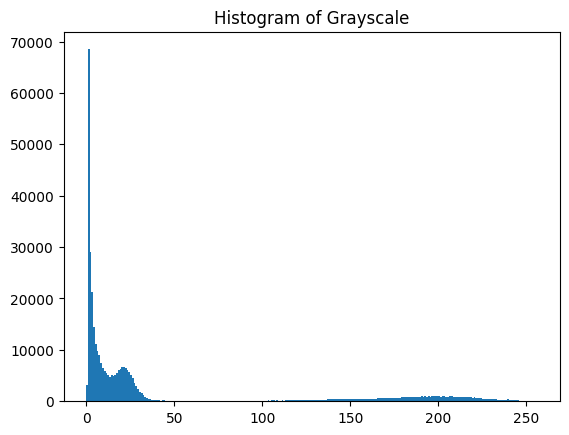

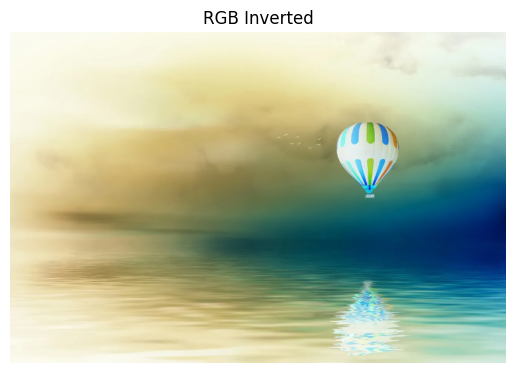

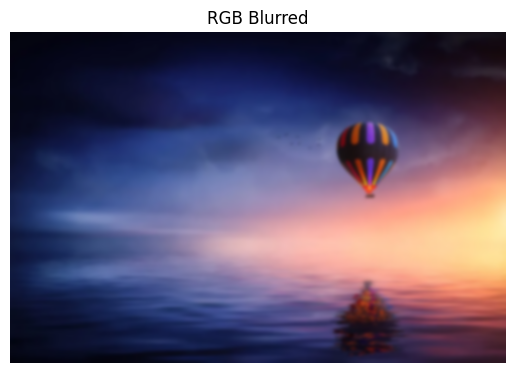

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rgb = cv2.imread('/content/5a.png')
gray = cv2.imread('/content/5b.jpg', cv2.IMREAD_GRAYSCALE)
indexed = cv2.imread('/content/5c.tif')

def show(title, img):
    if len(img.shape) == 3:
        img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_show = img
    plt.figure()
    plt.imshow(img_show, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

show('RGB', rgb)
show('Grayscale', gray)
show('Indexed', indexed)

rgb2gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
show('RGB→Grayscale', rgb2gray)

indexed2gray = cv2.cvtColor(indexed, cv2.COLOR_BGR2GRAY)
show('Indexed→Grayscale', indexed2gray)

indexed2rgb = cv2.cvtColor(indexed, cv2.COLOR_BGR2RGB)
show('Indexed→RGB', indexed2rgb)

_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
show('Binary', binary)

binary_inv = cv2.bitwise_not(binary)
show('Binary Inverted', binary_inv)

plt.figure()
plt.hist(gray.ravel(), 256, [0, 256])
plt.title('Histogram of Grayscale')
plt.show()

rgb_inv = cv2.bitwise_not(rgb)
show('RGB Inverted', rgb_inv)

rgb_blur = cv2.GaussianBlur(rgb, (15, 15), 0)
show('RGB Blurred', rgb_blur)